In [51]:
# Audio sample
sample = "audio_2"


In [52]:
from pyannote.audio import Pipeline, Model

# Hugging Face token
hf_token = input("Please enter your Hugging Face token: ")

# Load pre-trained models
diarization_pipeline = Pipeline.from_pretrained("pyannote/speaker-diarization@2.1", use_auth_token=hf_token)  # speaker diarization
model_pipeline = Model.from_pretrained("pyannote/segmentation", use_auth_token=hf_token)  # speech activity detection


Lightning automatically upgraded your loaded checkpoint from v1.5.4 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint C:\Users\ktzke\.cache\torch\pyannote\models--pyannote--segmentation\snapshots\c4c8ceafcbb3a7a280c2d357aee9fbc9b0be7f9b\pytorch_model.bin`
INFO:speechbrain.utils.fetching:Fetch hyperparams.yaml: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
d:\K Docs\DTNUM\Speaker-Diarization\traduction\translate-rt - Copie\venv\Lib\site-packages\speechbrain\utils\fetching.py:151: UserWarning: Using SYMLINK strategy on Windows for fetching potentially requires elevated privileges and is not recommended. See `LocalStrategy` documentation.
  warnings.warn(
INFO:speechbrain.utils.fetching:Fetch custom.py: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached


Model was trained with pyannote.audio 0.0.1, yours is 3.3.2. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.5.1+cpu. Bad things might happen unless you revert torch to 1.x.


d:\K Docs\DTNUM\Speaker-Diarization\traduction\translate-rt - Copie\venv\Lib\site-packages\speechbrain\utils\parameter_transfer.py:234: UserWarning: Requested Pretrainer collection using symlinks on Windows. This might not work; see `LocalStrategy` documentation. Consider unsetting `collect_in` in Pretrainer to avoid symlinking altogether.
  warnings.warn(
INFO:speechbrain.utils.fetching:Fetch embedding_model.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch mean_var_norm_emb.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch classifier.ckpt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.fetching:Fetch label_encoder.txt: Fetching from HuggingFace Hub 'speechbrain/spkrec-ecapa-voxceleb' if not cached
INFO:speechbrain.utils.parameter_transfer:Loading pretrained files for: embedding_model

Model was trained with pyannote.audio 0.0.1, yours is 3.3.2. Bad things might happen unless you revert pyannote.audio to 0.x.
Model was trained with torch 1.10.0+cu102, yours is 2.5.1+cpu. Bad things might happen unless you revert torch to 1.x.


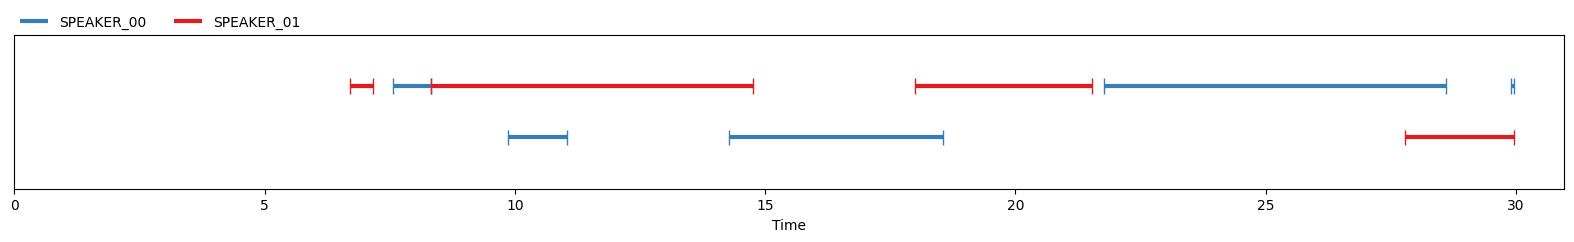

In [57]:
# Apply pipeline on sample
diarization = diarization_pipeline(f"audios/{sample}.wav", num_speakers=2)

diarization


In [58]:
# Enregistrer les résultats au format RTTM
with open(f"rttm/{sample}.rttm", "w") as rttm:
    diarization.write_rttm(rttm)

print(open(f"rttm/{sample}.rttm").read())

SPEAKER audio_2 1 6.713 0.456 <NA> <NA> SPEAKER_01 <NA> <NA>
SPEAKER audio_2 1 7.574 0.743 <NA> <NA> SPEAKER_00 <NA> <NA>
SPEAKER audio_2 1 8.317 6.446 <NA> <NA> SPEAKER_01 <NA> <NA>
SPEAKER audio_2 1 9.852 1.198 <NA> <NA> SPEAKER_00 <NA> <NA>
SPEAKER audio_2 1 14.273 4.269 <NA> <NA> SPEAKER_00 <NA> <NA>
SPEAKER audio_2 1 17.986 3.544 <NA> <NA> SPEAKER_01 <NA> <NA>
SPEAKER audio_2 1 21.766 6.834 <NA> <NA> SPEAKER_00 <NA> <NA>
SPEAKER audio_2 1 27.790 2.177 <NA> <NA> SPEAKER_01 <NA> <NA>
SPEAKER audio_2 1 29.900 0.067 <NA> <NA> SPEAKER_00 <NA> <NA>



In [59]:
# Enregistrer les résultats au format lab
with open(f"lab/{sample}.lab", "w") as lab_file:
    diarization.write_lab(lab_file)

print(open(f"lab/{sample}.lab").read())

6.713 7.169 SPEAKER_01
7.574 8.317 SPEAKER_00
8.317 14.763 SPEAKER_01
9.852 11.050 SPEAKER_00
14.273 18.543 SPEAKER_00
17.986 21.530 SPEAKER_01
21.766 28.600 SPEAKER_00
27.790 29.967 SPEAKER_01
29.900 29.967 SPEAKER_00



d:\K Docs\DTNUM\Speaker-Diarization\traduction\translate-rt - Copie\venv\Lib\site-packages\pyannote\database\util.py:178: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(


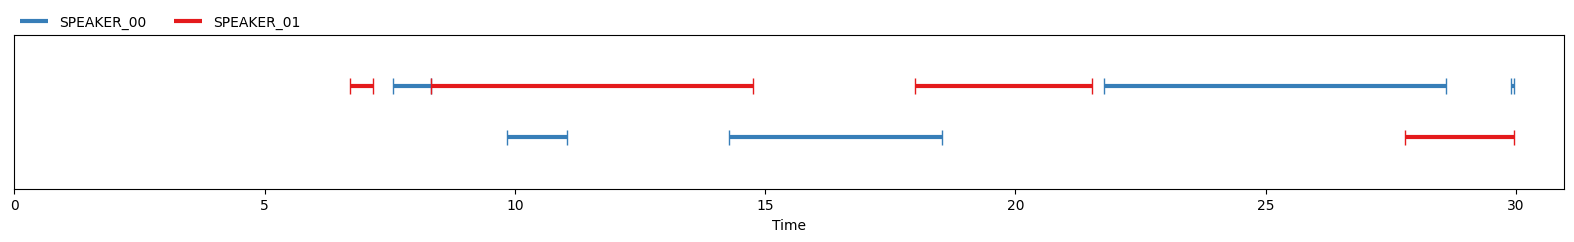

In [60]:
from pyannote.database.util import load_rttm

reference = load_rttm(f"rttm/{sample}.rttm")[sample]
reference

d:\K Docs\DTNUM\Speaker-Diarization\traduction\translate-rt - Copie\venv\Lib\site-packages\pyannote\database\util.py:178: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv(


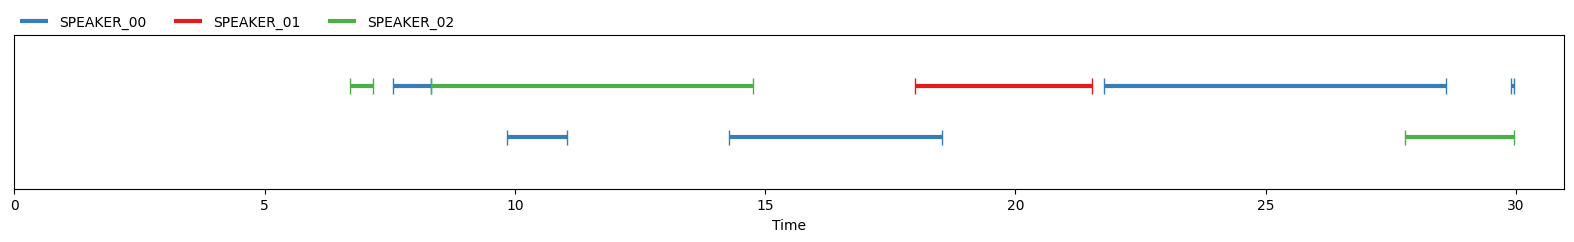

In [56]:
from pyannote.database.util import load_rttm

reference = load_rttm(f"rttm/{sample}.rttm")[sample]

""" note: si cela tronque à gauche, il faut : """
from pyannote.core import notebook, Segment

# Définir l'échelle temporelle à afficher (de 0 à une durée maximale)
notebook.crop = Segment(0, reference.get_timeline().extent().end + 1)

reference
